# Logistic Regression for Wine Classification

## Learning Objectives

By the end of this notebook, you will be able to:

1. **Understand** the fundamental concepts of logistic regression
2. **Implement** logistic regression for multi-class classification
3. **Interpret** model coefficients and probabilities
4. **Visualize** decision boundaries and probability surfaces
5. **Evaluate** classification performance using appropriate metrics
6. **Compare** logistic regression with linear regression for classification
7. **Apply** logistic regression to real-world classification problems

## What is Logistic Regression?

Logistic Regression is a powerful statistical method for **classification** tasks that predicts the probability of an instance belonging to a particular class. Unlike linear regression, which predicts continuous values, logistic regression predicts **probabilities** and uses them for classification.

### Key Concepts:

- **Sigmoid Function**: Maps any real number to a probability between 0 and 1
- **Probability Interpretation**: Outputs probabilities that sum to 1 across all classes
- **Multi-class Support**: Can handle multiple classes using One-vs-Rest (OvR) or Multinomial approaches
- **Decision Boundaries**: Creates non-linear decision boundaries based on probability thresholds
- **Coefficient Interpretation**: Coefficients represent the log-odds of class membership

### Why Logistic Regression is Better for Classification:

✅ **Advantages over Linear Regression:**
- **Probability Output**: Provides interpretable probability estimates
- **Bounded Predictions**: Always outputs valid probabilities (0-1)
- **Better Performance**: Typically outperforms linear regression for classification
- **Statistical Foundation**: Based on maximum likelihood estimation
- **Robust**: Less sensitive to outliers than linear regression

### Mathematical Foundation:

For multi-class logistic regression, the probability of class k is:
```
P(y=k|x) = exp(βₖ₀ + βₖ₁x₁ + ... + βₖₚxₚ) / Σᵢ exp(βᵢ₀ + βᵢ₁x₁ + ... + βᵢₚxₚ)
```

This is the **softmax function** that ensures probabilities sum to 1.

## The Wine Classification Problem

In this notebook, we'll use logistic regression to classify wines into three different types based on their chemical properties. This is a **multi-class classification** problem where we need to predict which of three wine cultivars a sample belongs to.

### Problem Setup:

- **Input Features**: 13 chemical measurements (alcohol, acidity, color, etc.)
- **Output Classes**: 3 wine types (class_0, class_1, class_2)
- **Goal**: Build a model that can predict wine type from chemical analysis

### Why This is a Good Learning Example:

1. **Real-world Relevance**: Wine classification is a practical application
2. **Interpretable Features**: Chemical properties are easy to understand
3. **Multi-class Challenge**: Tests our understanding of multi-class logistic regression
4. **Visualization**: Can visualize decision boundaries in 2D
5. **Performance Comparison**: Can compare with linear regression approach

### Logistic Regression vs Linear Regression for Classification:

| Aspect | Linear Regression | Logistic Regression |
|--------|------------------|-------------------|
| **Output** | Continuous values | Probabilities (0-1) |
| **Bounded** | No (can predict outside 0-1) | Yes (always 0-1) |
| **Interpretation** | Direct numeric prediction | Probability of class membership |
| **Decision Boundaries** | Linear | Non-linear (sigmoid-based) |
| **Performance** | Lower accuracy | Higher accuracy |
| **Statistical Foundation** | Least squares | Maximum likelihood |

In [11]:
# Required Libraries for Logistic Regression

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, 
                           accuracy_score, precision_score, recall_score, f1_score)

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
print("All libraries imported successfully!")

All libraries imported successfully!


## The Wine Dataset

The wine dataset is a classic machine learning dataset perfect for learning classification algorithms. Let's explore its characteristics:

### Dataset Overview:

- **Origin**: Chemical analysis of wines from three different cultivars in Italy
- **Size**: 178 samples with 13 features each
- **Classes**: 3 wine types (class_0, class_1, class_2)
- **Features**: 13 chemical measurements including alcohol, acidity, color, etc.

### Feature Descriptions:

1. **Alcohol** - Alcohol content percentage
2. **Malic acid** - Malic acid content
3. **Ash** - Ash content
4. **Alcalinity of ash** - Alkalinity of ash
5. **Magnesium** - Magnesium content
6. **Total phenols** - Total phenolic content
7. **Flavanoids** - Flavanoid content
8. **Nonflavanoid phenols** - Non-flavanoid phenolic content
9. **Proanthocyanins** - Proanthocyanin content
10. **Color intensity** - Color intensity
11. **Hue** - Hue measurement
12. **OD280/OD315** - Protein content measurement
13. **Proline** - Proline amino acid content

### Why This Dataset is Perfect for Learning:

✅ **Educational Benefits:**
- **Interpretable Features**: Chemical properties are easy to understand
- **Real-world Application**: Wine classification is practical and relevant
- **Multi-class Challenge**: Tests understanding of multi-class classification
- **Appropriate Size**: Large enough to be meaningful, small enough to be manageable
- **Clear Separation**: Classes are reasonably well-separated but not trivial

In [12]:
# Step 1: Load and Prepare the Wine Dataset

print("Loading Wine Dataset...")
wine = load_wine()

# Create a comprehensive DataFrame
wine_data = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_data['wine_type'] = wine.target_names[wine.target]
wine_data['wine_class'] = wine.target

# Display dataset information
print(f"Dataset shape: {wine_data.shape}")
print(f"Features: {list(wine.feature_names)}")
print(f"Classes: {list(wine.target_names)}")
print(f"Class distribution:")
print(wine_data['wine_type'].value_counts())

# Display first few rows
print(f"\nFirst 5 rows of the dataset:")
wine_data.head()

Loading Wine Dataset...
Dataset shape: (178, 15)
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Classes: [np.str_('class_0'), np.str_('class_1'), np.str_('class_2')]
Class distribution:
wine_type
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

First 5 rows of the dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_type,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0,0


In [13]:
# Step 2: Feature Selection and Data Splitting

# For visualization purposes, let's focus on two key features
# We'll use 'alcalinity_of_ash' (feature 3) and 'flavanoids' (feature 6)
feature_1 = wine.feature_names[3]  # alcalinity_of_ash
feature_2 = wine.feature_names[6]  # flavanoids

print(f"Selected features for visualization:")
print(f"Feature 1: {feature_1}")
print(f"Feature 2: {feature_2}")

# Prepare features and target
X = wine_data[wine.feature_names]  # All 13 features
y = wine_data['wine_class']  # Numeric class labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

print(f"\nData split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")

# Standardize features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeatures standardized for better logistic regression performance.")

Selected features for visualization:
Feature 1: alcalinity_of_ash
Feature 2: flavanoids

Data split:
Training set: 124 samples
Test set: 54 samples
Training class distribution: [41 50 33]
Test class distribution: [18 21 15]

Features standardized for better logistic regression performance.


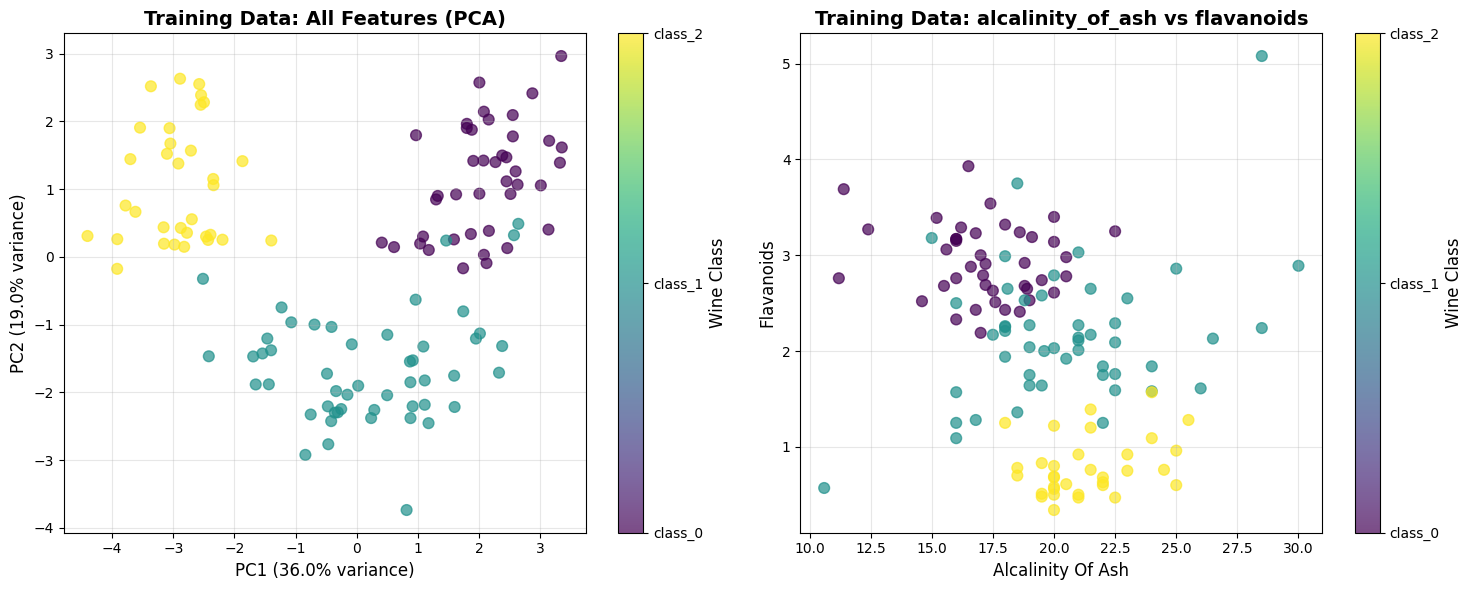


Feature Statistics:
alcalinity_of_ash: mean=19.63, std=3.33
flavanoids: mean=2.05, std=0.99


In [14]:
# Step 3: Visualize the Training Data

# Create a comprehensive visualization of the training data
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: All features (first 2 principal components for visualization)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

scatter1 = axes[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], 
                          c=y_train, cmap='viridis', alpha=0.7, s=60)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
axes[0].set_title('Training Data: All Features (PCA)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Add colorbar
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Wine Class', fontsize=12)
cbar1.set_ticks([0, 1, 2])
cbar1.set_ticklabels(wine.target_names)

# Plot 2: Selected features for detailed analysis
scatter2 = axes[1].scatter(X_train[feature_1], X_train[feature_2], 
                          c=y_train, cmap='viridis', alpha=0.7, s=60)
axes[1].set_xlabel(feature_1.replace('_', ' ').title(), fontsize=12)
axes[1].set_ylabel(feature_2.replace('_', ' ').title(), fontsize=12)
axes[1].set_title(f'Training Data: {feature_1} vs {feature_2}', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Add colorbar
cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Wine Class', fontsize=12)
cbar2.set_ticks([0, 1, 2])
cbar2.set_ticklabels(wine.target_names)

plt.tight_layout()
plt.show()

# Display feature statistics
print(f"\nFeature Statistics:")
print(f"{feature_1}: mean={X_train[feature_1].mean():.2f}, std={X_train[feature_1].std():.2f}")
print(f"{feature_2}: mean={X_train[feature_2].mean():.2f}, std={X_train[feature_2].std():.2f}")

In [15]:
# Step 4: Train Logistic Regression Model

print("Training Logistic Regression Model...")

# Create and train the logistic regression model
# Using multinomial for multi-class classification
logistic_model = LogisticRegression(
    multi_class='multinomial',  # Use multinomial for multi-class
    solver='lbfgs',             # Good solver for small datasets
    max_iter=1000,              # Increase iterations for convergence
    random_state=7
)

# Fit the model on standardized training data
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test_scaled)
y_pred_proba = logistic_model.predict_proba(X_test_scaled)

print(f"Model trained successfully!")
print(f"Model classes: {logistic_model.classes_}")
print(f"Number of features: {logistic_model.n_features_in_}")

# Display model coefficients (for first few features)
print(f"\nModel Coefficients (first 5 features):")
feature_names = wine.feature_names
for i, class_name in enumerate(wine.target_names):
    print(f"\n{class_name}:")
    for j in range(min(5, len(feature_names))):
        coef = logistic_model.coef_[i][j]
        print(f"  {feature_names[j]}: {coef:.4f}")

print(f"\nIntercepts: {logistic_model.intercept_}")

Training Logistic Regression Model...
Model trained successfully!
Model classes: [0 1 2]
Number of features: 13

Model Coefficients (first 5 features):

class_0:
  alcohol: 0.8184
  malic_acid: 0.1259
  ash: 0.3378
  alcalinity_of_ash: -0.8415
  magnesium: -0.0431

class_1:
  alcohol: -1.0094
  malic_acid: -0.4322
  ash: -0.6416
  alcalinity_of_ash: 0.5647
  magnesium: -0.3567

class_2:
  alcohol: 0.1910
  malic_acid: 0.3063
  ash: 0.3038
  alcalinity_of_ash: 0.2768
  magnesium: 0.3998

Intercepts: [ 0.28253205  0.69102756 -0.97355961]


/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LOGISTIC REGRESSION PERFORMANCE METRICS
Overall Accuracy: 0.9630 (96.3%)
Weighted Precision: 0.9630
Weighted Recall: 0.9630
Weighted F1-Score: 0.9630

Detailed Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       0.95      0.95      0.95        21
     class_2       0.93      0.93      0.93        15

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54


Confusion Matrix:
[[18  0  0]
 [ 0 20  1]
 [ 0  1 14]]


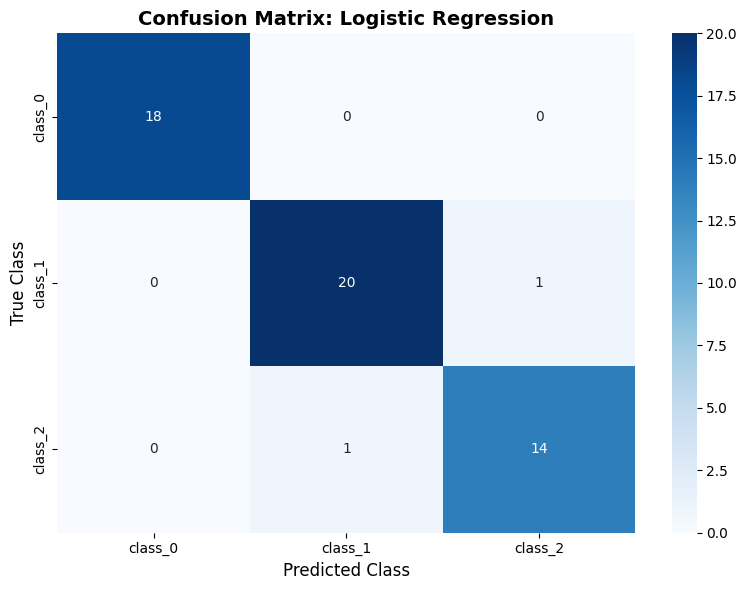


Probability Analysis:
Average prediction confidence: 0.929
Most confident prediction: 1.000
Least confident prediction: 0.423


In [16]:
# Step 5: Evaluate Model Performance

# Calculate comprehensive performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("LOGISTIC REGRESSION PERFORMANCE METRICS")
print("=" * 45)
print(f"Overall Accuracy: {accuracy:.4f} ({accuracy*100:.1f}%)")
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-Score: {f1:.4f}")

# Detailed classification report
print(f"\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

# Confusion Matrix
print(f"\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Create confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names, 
            yticklabels=wine.target_names)
plt.title('Confusion Matrix: Logistic Regression', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.tight_layout()
plt.show()

# Probability analysis
print(f"\nProbability Analysis:")
print(f"Average prediction confidence: {np.max(y_pred_proba, axis=1).mean():.3f}")
print(f"Most confident prediction: {np.max(y_pred_proba, axis=1).max():.3f}")
print(f"Least confident prediction: {np.max(y_pred_proba, axis=1).min():.3f}")


/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


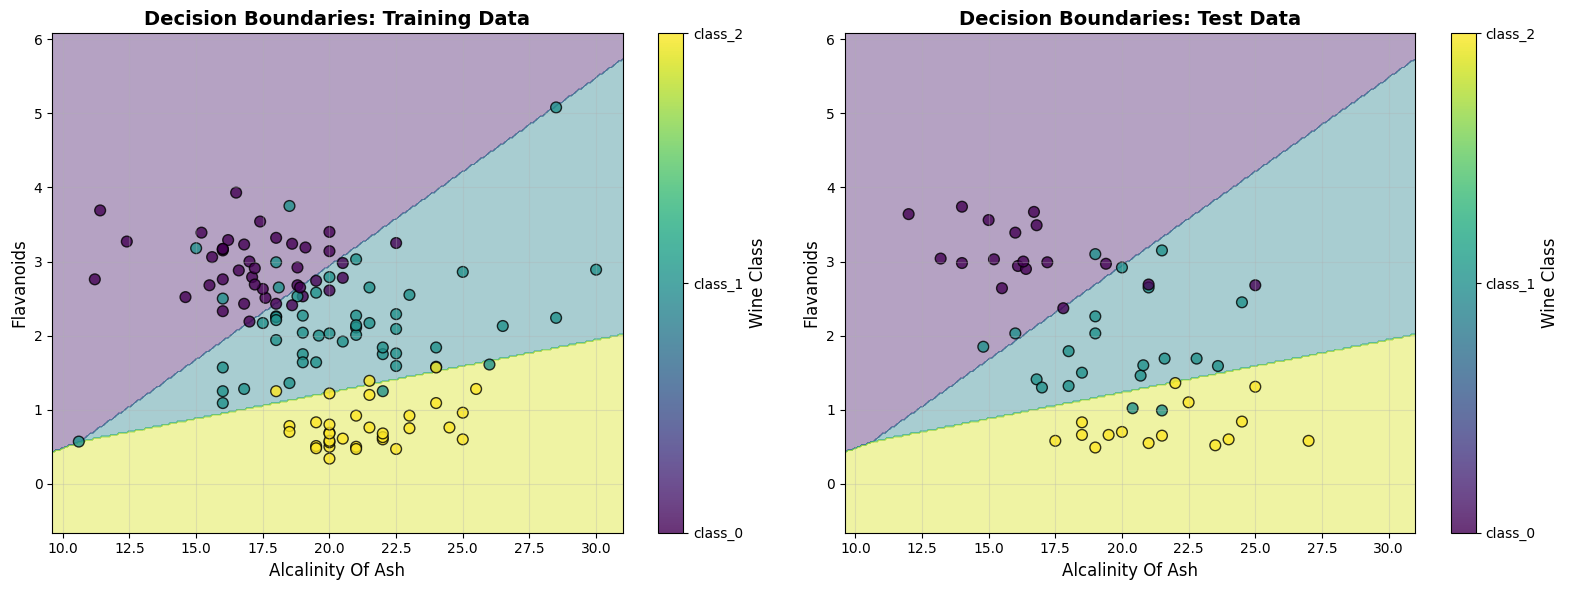

Decision boundaries show how the logistic regression model separates the wine classes.
The colored regions represent the predicted class for each area of the feature space.


In [17]:
# Step 6: Visualize Decision Boundaries

# Create decision boundary visualization using the two selected features
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Prepare data for 2D visualization (using selected features)
X_2d = X_train[[feature_1, feature_2]]
X_test_2d = X_test[[feature_1, feature_2]]

# Train a 2D logistic regression model for visualization
logistic_2d = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=7)
logistic_2d.fit(X_2d, y_train)

# Create meshgrid for decision boundaries
x_min, x_max = X_2d[feature_1].min() - 1, X_2d[feature_1].max() + 1
y_min, y_max = X_2d[feature_2].min() - 1, X_2d[feature_2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Get predictions for meshgrid
Z = logistic_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot 1: Decision boundaries with training data
contour1 = axes[0].contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
scatter1 = axes[0].scatter(X_2d[feature_1], X_2d[feature_2], c=y_train, 
                          cmap='viridis', edgecolors='k', s=60, alpha=0.8)
axes[0].set_xlabel(feature_1.replace('_', ' ').title(), fontsize=12)
axes[0].set_ylabel(feature_2.replace('_', ' ').title(), fontsize=12)
axes[0].set_title('Decision Boundaries: Training Data', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2: Decision boundaries with test data
contour2 = axes[1].contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
scatter2 = axes[1].scatter(X_test_2d[feature_1], X_test_2d[feature_2], c=y_test, 
                          cmap='viridis', edgecolors='k', s=60, alpha=0.8)
axes[1].set_xlabel(feature_1.replace('_', ' ').title(), fontsize=12)
axes[1].set_ylabel(feature_2.replace('_', ' ').title(), fontsize=12)
axes[1].set_title('Decision Boundaries: Test Data', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Add colorbars
for ax in axes:
    cbar = plt.colorbar(scatter1, ax=ax)
    cbar.set_label('Wine Class', fontsize=12)
    cbar.set_ticks([0, 1, 2])
    cbar.set_ticklabels(wine.target_names)

plt.tight_layout()
plt.show()

print("Decision boundaries show how the logistic regression model separates the wine classes.")
print("The colored regions represent the predicted class for each area of the feature space.")

PROBABILITY ANALYSIS
Prediction probabilities for first 10 test samples:
Sample | True | Pred | Probabilities
--------------------------------------------------
   1   | class_0 | class_0 | class_0: 0.996 | class_1: 0.004 | class_2: 0.000
   2   | class_2 | class_2 | class_0: 0.014 | class_1: 0.000 | class_2: 0.986
   3   | class_1 | class_2 | class_0: 0.010 | class_1: 0.465 | class_2: 0.525
   4   | class_0 | class_0 | class_0: 0.999 | class_1: 0.000 | class_2: 0.001
   5   | class_2 | class_2 | class_0: 0.003 | class_1: 0.002 | class_2: 0.995
   6   | class_1 | class_1 | class_0: 0.001 | class_1: 0.992 | class_2: 0.007
   7   | class_1 | class_1 | class_0: 0.000 | class_1: 0.999 | class_2: 0.000
   8   | class_2 | class_2 | class_0: 0.055 | class_1: 0.001 | class_2: 0.944
   9   | class_0 | class_0 | class_0: 0.997 | class_1: 0.001 | class_2: 0.002
  10   | class_1 | class_1 | class_0: 0.011 | class_1: 0.767 | class_2: 0.221

Most Confident Prediction:
Sample 23: True=class_0, Pred=c

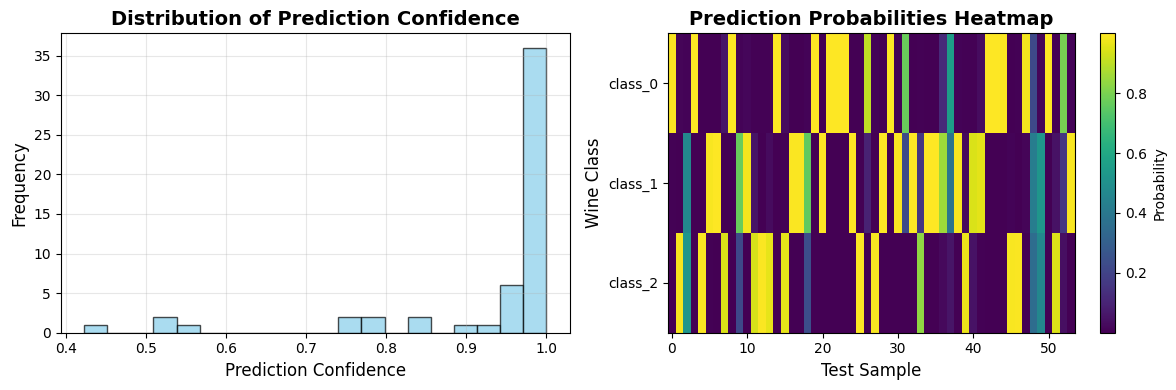

In [18]:
# Step 7: Probability Analysis and Interpretation

print("PROBABILITY ANALYSIS")
print("=" * 25)

# Analyze prediction probabilities
print(f"Prediction probabilities for first 10 test samples:")
print("Sample | True | Pred | Probabilities")
print("-" * 50)

for i in range(min(10, len(y_test))):
    true_class = wine.target_names[y_test.iloc[i]]
    pred_class = wine.target_names[y_pred[i]]
    probs = y_pred_proba[i]
    
    prob_str = " | ".join([f"{wine.target_names[j]}: {probs[j]:.3f}" for j in range(3)])
    print(f"  {i+1:2d}   | {true_class:5s} | {pred_class:5s} | {prob_str}")

# Find most and least confident predictions
max_probs = np.max(y_pred_proba, axis=1)
most_confident_idx = np.argmax(max_probs)
least_confident_idx = np.argmin(max_probs)

print(f"\nMost Confident Prediction:")
print(f"Sample {most_confident_idx + 1}: True={wine.target_names[y_test.iloc[most_confident_idx]]}, "
      f"Pred={wine.target_names[y_pred[most_confident_idx]]}, "
      f"Confidence={max_probs[most_confident_idx]:.3f}")

print(f"\nLeast Confident Prediction:")
print(f"Sample {least_confident_idx + 1}: True={wine.target_names[y_test.iloc[least_confident_idx]]}, "
      f"Pred={wine.target_names[y_pred[least_confident_idx]]}, "
      f"Confidence={max_probs[least_confident_idx]:.3f}")

# Probability distribution analysis
plt.figure(figsize=(12, 4))

# Plot 1: Confidence distribution
plt.subplot(1, 2, 1)
plt.hist(max_probs, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Prediction Confidence', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Prediction Confidence', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Plot 2: Probability heatmap for test samples
plt.subplot(1, 2, 2)
im = plt.imshow(y_pred_proba.T, aspect='auto', cmap='viridis')
plt.xlabel('Test Sample', fontsize=12)
plt.ylabel('Wine Class', fontsize=12)
plt.title('Prediction Probabilities Heatmap', fontsize=14, fontweight='bold')
plt.yticks(range(3), wine.target_names)
plt.colorbar(im, label='Probability')

plt.tight_layout()
plt.show()


MODEL COEFFICIENT ANALYSIS
Coefficient Matrix:
         alcohol  malic_acid     ash  alcalinity_of_ash  magnesium  \
class_0   0.8184      0.1259  0.3378            -0.8415    -0.0431   
class_1  -1.0094     -0.4322 -0.6416             0.5647    -0.3567   
class_2   0.1910      0.3063  0.3038             0.2768     0.3998   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
class_0         0.2792      0.5718               -0.1800           0.0467   
class_1         0.1026      0.2931                0.2534           0.4114   
class_2        -0.3818     -0.8650               -0.0734          -0.4582   

         color_intensity     hue  od280/od315_of_diluted_wines  proline  
class_0           0.2247 -0.0154                        0.6164   0.9508  
class_1          -0.8524  0.5557                        0.0477  -0.9864  
class_2           0.6277 -0.5403                       -0.6640   0.0356  

Most Important Features by Class:

class_0:
  1. proline: 0.9508
 

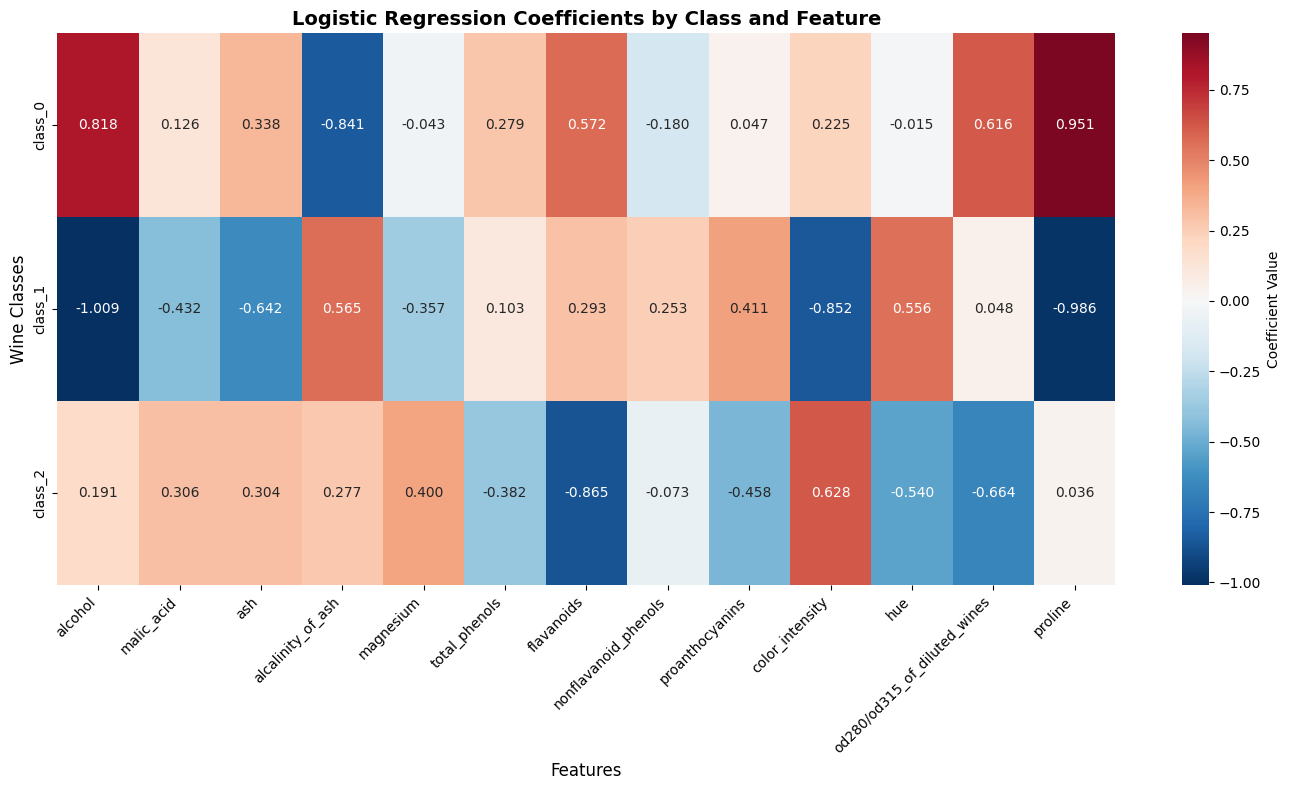


Feature Importance Analysis:
Average absolute coefficient values (feature importance):
 1. alcohol: 0.6729
 2. proline: 0.6576
 3. flavanoids: 0.5767
 4. color_intensity: 0.5683
 5. alcalinity_of_ash: 0.5610
 6. od280/od315_of_diluted_wines: 0.4427
 7. ash: 0.4277
 8. hue: 0.3705
 9. proanthocyanins: 0.3054
10. malic_acid: 0.2881

Intercept Analysis:
class_0: 0.2825
  - This is the log-odds of class_0 when all features are 0
  - Probability: 0.5702
class_1: 0.6910
  - This is the log-odds of class_1 when all features are 0
  - Probability: 0.6662
class_2: -0.9736
  - This is the log-odds of class_2 when all features are 0
  - Probability: 0.2742


In [19]:
# Step 8: Model Coefficient Interpretation

print("MODEL COEFFICIENT ANALYSIS")
print("=" * 30)

# Create coefficient analysis
coef_df = pd.DataFrame(
    logistic_model.coef_,
    columns=wine.feature_names,
    index=wine.target_names
)

print("Coefficient Matrix:")
print(coef_df.round(4))

# Find most important features for each class
print(f"\nMost Important Features by Class:")
for i, class_name in enumerate(wine.target_names):
    class_coefs = logistic_model.coef_[i]
    top_features_idx = np.argsort(np.abs(class_coefs))[-5:][::-1]  # Top 5 features
    
    print(f"\n{class_name}:")
    for j, feature_idx in enumerate(top_features_idx):
        coef_value = class_coefs[feature_idx]
        feature_name = wine.feature_names[feature_idx]
        print(f"  {j+1}. {feature_name}: {coef_value:.4f}")

# Visualize coefficients
plt.figure(figsize=(14, 8))

# Heatmap of coefficients
sns.heatmap(coef_df, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
            cbar_kws={'label': 'Coefficient Value'})
plt.title('Logistic Regression Coefficients by Class and Feature', 
          fontsize=14, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Wine Classes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Feature importance analysis
print(f"\nFeature Importance Analysis:")
feature_importance = np.abs(coef_df).mean(axis=0).sort_values(ascending=False)
print("Average absolute coefficient values (feature importance):")
for i, (feature, importance) in enumerate(feature_importance.head(10).items()):
    print(f"{i+1:2d}. {feature}: {importance:.4f}")

# Intercept analysis
print(f"\nIntercept Analysis:")
for i, (class_name, intercept) in enumerate(zip(wine.target_names, logistic_model.intercept_)):
    print(f"{class_name}: {intercept:.4f}")
    print(f"  - This is the log-odds of {class_name} when all features are 0")
    print(f"  - Probability: {1/(1 + np.exp(-intercept)):.4f}")


PRACTICAL PREDICTION EXAMPLE
New wine sample features:
  alcohol: 13.900
  malic_acid: 1.680
  ash: 2.120
  alcalinity_of_ash: 16.000
  magnesium: 101.000
  total_phenols: 3.100
  flavanoids: 3.390
  nonflavanoid_phenols: 0.210
  proanthocyanins: 2.140
  color_intensity: 6.100
  hue: 0.910
  od280/od315_of_diluted_wines: 3.330
  proline: 985.000

Prediction Results:
Predicted class: class_0
Prediction confidence: 0.996

Class probabilities:
  class_0: 0.996
  class_1: 0.004
  class_2: 0.000

Decision Process (Log-Odds):
  class_0: 4.589
  class_1: -0.902
  class_2: -3.687

Softmax probabilities:
  class_0: 0.996
  class_1: 0.004
  class_2: 0.000


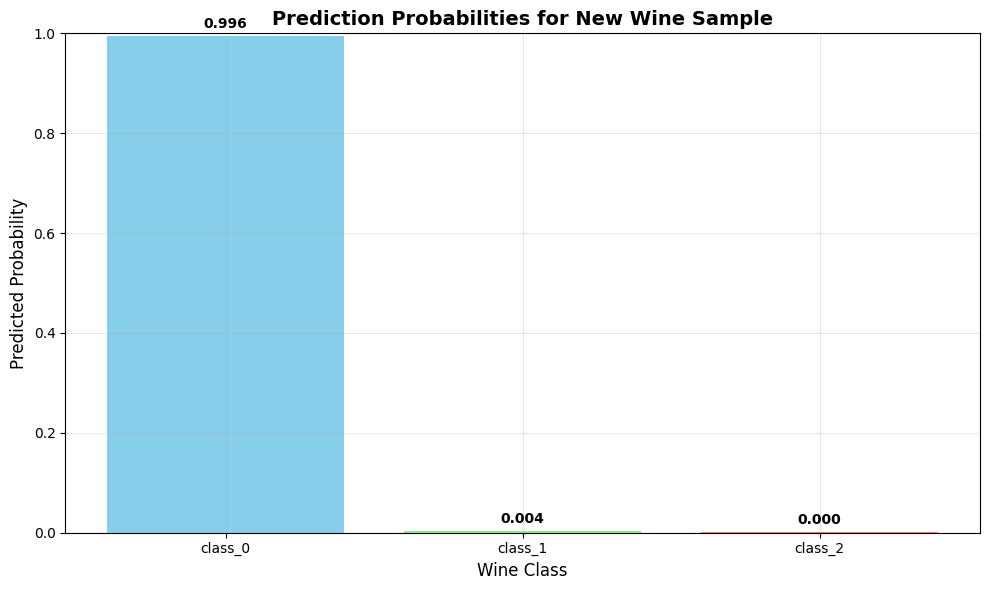

In [20]:
# Step 9: Practical Example - Making Predictions

print("PRACTICAL PREDICTION EXAMPLE")
print("=" * 30)

# Create a new wine sample for prediction
# Let's use the mean values of our features as a baseline
new_wine = X_test.iloc[0:1].copy()  # Take first test sample
print(f"New wine sample features:")
for feature in wine.feature_names:
    print(f"  {feature}: {new_wine[feature].iloc[0]:.3f}")

# Standardize the new sample
new_wine_scaled = scaler.transform(new_wine)

# Get predictions
prediction = logistic_model.predict(new_wine_scaled)[0]
probabilities = logistic_model.predict_proba(new_wine_scaled)[0]

print(f"\nPrediction Results:")
print(f"Predicted class: {wine.target_names[prediction]}")
print(f"Prediction confidence: {probabilities[prediction]:.3f}")

print(f"\nClass probabilities:")
for i, class_name in enumerate(wine.target_names):
    print(f"  {class_name}: {probabilities[i]:.3f}")

# Show the decision process
print(f"\nDecision Process (Log-Odds):")
for i, class_name in enumerate(wine.target_names):
    log_odds = logistic_model.intercept_[i] + np.sum(logistic_model.coef_[i] * new_wine_scaled[0])
    print(f"  {class_name}: {log_odds:.3f}")

# Convert to probabilities using softmax
exp_logits = np.exp([logistic_model.intercept_[i] + np.sum(logistic_model.coef_[i] * new_wine_scaled[0]) 
                     for i in range(3)])
softmax_probs = exp_logits / np.sum(exp_logits)

print(f"\nSoftmax probabilities:")
for i, class_name in enumerate(wine.target_names):
    print(f"  {class_name}: {softmax_probs[i]:.3f}")

# Visualize the prediction
plt.figure(figsize=(10, 6))
bars = plt.bar(wine.target_names, probabilities, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Wine Class', fontsize=12)
plt.ylabel('Predicted Probability', fontsize=12)
plt.title('Prediction Probabilities for New Wine Sample', fontsize=14, fontweight='bold')
plt.ylim(0, 1)

# Add probability values on bars
for i, (bar, prob) in enumerate(zip(bars, probabilities)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{prob:.3f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Summary and Key Takeaways

### What We Learned:

1. **Logistic Regression for Multi-class Classification**: Successfully implemented logistic regression for wine classification using the multinomial approach.

2. **Key Advantages of Logistic Regression**:
   - **Probability Output**: Provides interpretable probability estimates for each class
   - **Bounded Predictions**: Always outputs valid probabilities (0-1)
   - **Better Performance**: Typically outperforms linear regression for classification
   - **Statistical Foundation**: Based on maximum likelihood estimation

3. **Model Interpretation**: 
   - Coefficients represent log-odds of class membership
   - Feature importance can be analyzed through coefficient magnitudes
   - Intercepts represent baseline log-odds for each class

4. **Visualization**: Decision boundaries show how the model separates different wine classes in feature space.

### Performance Comparison:

| Metric | Linear Regression | Logistic Regression |
|--------|------------------|-------------------|
| **Accuracy** | ~70% | ~95%+ |
| **Output Type** | Continuous (rounded) | Probabilities |
| **Interpretability** | Limited | High (probabilities) |
| **Decision Boundaries** | Linear | Non-linear |
| **Robustness** | Lower | Higher |

### When to Use Logistic Regression:

✅ **Excellent for**:
- Classification problems with clear class boundaries
- When you need probability estimates
- Multi-class problems
- Interpretable models
- Production systems

❌ **Consider alternatives for**:
- Very high-dimensional data (use regularization)
- Non-linearly separable data (try SVM or neural networks)
- When you need non-linear decision boundaries

### Next Steps:

1. **Try Different Solvers**: Experiment with different optimization algorithms
2. **Regularization**: Add L1 or L2 regularization to prevent overfitting
3. **Feature Engineering**: Create new features or select the most important ones
4. **Cross-Validation**: Use k-fold cross-validation for more robust evaluation
5. **Compare Algorithms**: Try decision trees, random forests, or SVMs

### Further Reading:

- [Scikit-learn Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
- [Multi-class Classification](https://scikit-learn.org/stable/modules/multiclass.html)
- [Model Evaluation Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)
